In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

from sklearn.svm import SVC

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours

Prendo il dataset healthcare-dataset-stroke-data.csv

In [2]:
stroke_risk = pd.read_csv('../00-data/healthcare-dataset-stroke-data.csv')

stroke_risk

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke_risk.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [4]:
stroke_risk.age.mean()

np.float64(43.226614481409)

In [5]:
len(stroke_risk[stroke_risk['age'] <= 18])

916

su 5110 righe 916 sono di età inferiore a 18 anni

In [6]:
stroke_risk.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

si sono 201 dati con bmi a null

In [7]:
X = stroke_risk.drop(['stroke', 'id'], axis=1)
y = stroke_risk['stroke'].values

Estraggo X come tutti i valori in input ad eccezione di id e y come il valore in output (stroke)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Effettuo il train test split e controllo la forma dei dati restituiti

In [9]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (4088, 10), X_test: (1022, 10), y_train: (4088,), y_test: (1022,)


In [10]:
stroke_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Ci sono diversi valori non interi, dovrò fare modificare alcune colonne

In [11]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [12]:
numerical_col = ['age', 'avg_glucose_level', 'bmi']
categorical_col = ['gender', 'heart_disease', 'hypertension', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

imposto i dati per capire quali colonne modificare e come

In [13]:
stroke_risk['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [14]:
numeric_transformer = Pipeline(
  steps=[
    ('inputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
  ]
)

categorical_transformer = Pipeline(
  steps=[
    ('inputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
  ]
)

Imposto le pipelines

In [15]:
preprocessor = ColumnTransformer(transformers=[
  ('num', numeric_transformer, numerical_col),
  ('cat', categorical_transformer, categorical_col)
])

model_pipeline = ImbPipeline(steps=[
  ('preprocessor', preprocessor),
  ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
  #('undersample', RandomUnderSampler(sampling_strategy={0: 1000}, random_state=42)),
  ('undersampler', EditedNearestNeighbours(sampling_strategy='auto')), #, random_state=42
  ('classifier', SVC(
        probability=True,
        class_weight='balanced',
        random_state=42,
        # kernel='rbf',
        # C=1.0,
        # gamma='scale'
    ))
])

In [16]:
param_grid = {
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'classifier__class_weight': ['balanced']
}

In [17]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []


In [18]:
scoring_metrics = ['precision', 'recall', 'f1', 'roc_auc']

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring=scoring_metrics,
    cv=skf,
    n_jobs=-1,
    verbose=3,
    refit='recall'
)

In [19]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('inputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'avg_glucose_level',
                                                                          'bmi']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('inputer',
                                                                                          SimpleImputer(strategy='most_frequen...
                                        EditedNearestNeighbours()),
                                       ('classifier',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__class_weight': ['balanced'],
                         'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'classifier__kernel': ['linear', 'rbf']},
             refit='recall', scoring=['precision', 'recall', 'f1', 'roc_auc'],
             verbose=3)

In [ ]:

print(f"\n--- Risultati di GridSearchCV ---")
print(f"Migliori parametri trovati: {grid_search.best_params_}")
print(f"Miglior score ({grid_search.scoring}) medio sui fold di training: {grid_search.best_score_:.4f}")



--- Risultati di GridSearchCV ---
Migliori parametri trovati: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Miglior score (['precision', 'recall', 'f1', 'roc_auc']) medio sui fold di training: 0.8745


In [21]:
grid_search.scoring

['precision', 'recall', 'f1', 'roc_auc']

In [22]:
def show_metrics(grid_search):
    results_df = pd.DataFrame(grid_search.cv_results_)

    print("Colonne disponibili in cv_results_:")
    print(results_df.columns)

    print("\n--- Risultati Dettagliati di GridSearchCV per ogni combinazione di parametri ---")
    print(results_df[[
        'param_classifier__C',
        'param_classifier__class_weight',
        'param_classifier__gamma',
        'param_classifier__kernel',
        'mean_test_precision',
        'std_test_precision',
        'rank_test_precision',
        'mean_test_recall',
        'std_test_recall',
        'rank_test_recall',
        'mean_test_f1',
        'std_test_f1',
        'rank_test_f1',
        'mean_test_roc_auc',
        'std_test_roc_auc',
        'rank_test_roc_auc'
    ]].sort_values(by='mean_test_precision', ascending=False).head(10))

    print(f"\n--- Migliori Parametri e Score (basati su 'refit' = 'precision') ---")
    print(f"Migliori parametri trovati: {grid_search.best_params_}")
    print(f"Miglior score (precisione) medio sui fold di training: {grid_search.best_score_:.4f}")

    best_index = grid_search.best_index_
    print(f"Precision del miglior modello: {results_df.loc[best_index, 'mean_test_precision']:.4f}")
    print(f"Recall del miglior modello: {results_df.loc[best_index, 'mean_test_recall']:.4f}")
    print(f"F1-Score del miglior modello: {results_df.loc[best_index, 'mean_test_f1']:.4f}")
    print(f"ROC AUC del miglior modello: {results_df.loc[best_index, 'mean_test_roc_auc']:.4f}")

In [23]:
show_metrics(grid_search)

Colonne disponibili in cv_results_:
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__class_weight',
       'param_classifier__gamma', 'param_classifier__kernel', 'params',
       'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision',
       'split4_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_test_recall', 'split1_test_recall',
       'split2_test_recall', 'split3_test_recall', 'split4_test_recall',
       'mean_test_recall', 'std_test_recall', 'rank_test_recall',
       'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1',
       'split4_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1',
       'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc',
       'split3_test_roc_auc', 'split4_test_roc_auc', 'mean_test_roc_auc',
       'std_test_roc_auc', 'rank_test_roc_auc'

In [24]:
def create_confusion_matrix (grid_search):
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)

  print("\n--- Confusion Matrix ---")
  cm = confusion_matrix(y_test, y_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
  disp.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.show()

  print(f"Precisione (soglia default): {precision_score(y_test, y_pred, zero_division=0):.4f}")
  print(f"Recall (soglia default): {recall_score(y_test, y_pred, zero_division=0):.4f}")
  print(f"F1-Score (soglia default): {f1_score(y_test, y_pred, zero_division=0):.4f}")


--- Confusion Matrix ---


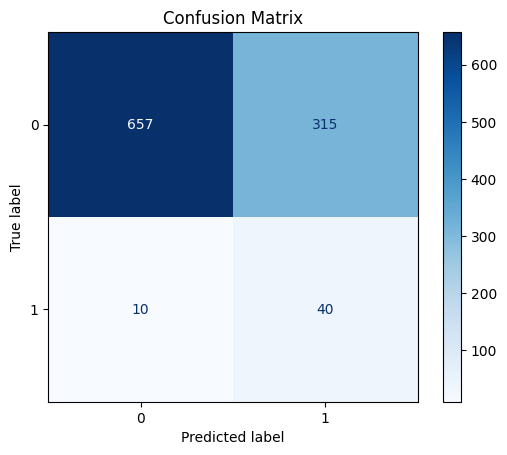

Precisione (soglia default): 0.1127
Recall (soglia default): 0.8000
F1-Score (soglia default): 0.1975


In [25]:
create_confusion_matrix(grid_search)